## TITANIC DATASET

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_excel('Titanic_dataset.xlsx')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [4]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


## Does gender affect one's survival rate?
### Find out the number of people that survived and died by gender

In [5]:
male_surv_count = len(df[(df['sex']=='male') & (df['survived']==1)])
male_dead_count = len(df[(df['sex']=='male') & (df['survived']==0)])

female_surv_count = len(df[(df['sex']=='female') & (df['survived']==1)])
female_dead_count = len(df[(df['sex']=='female') & (df['survived']==0)])

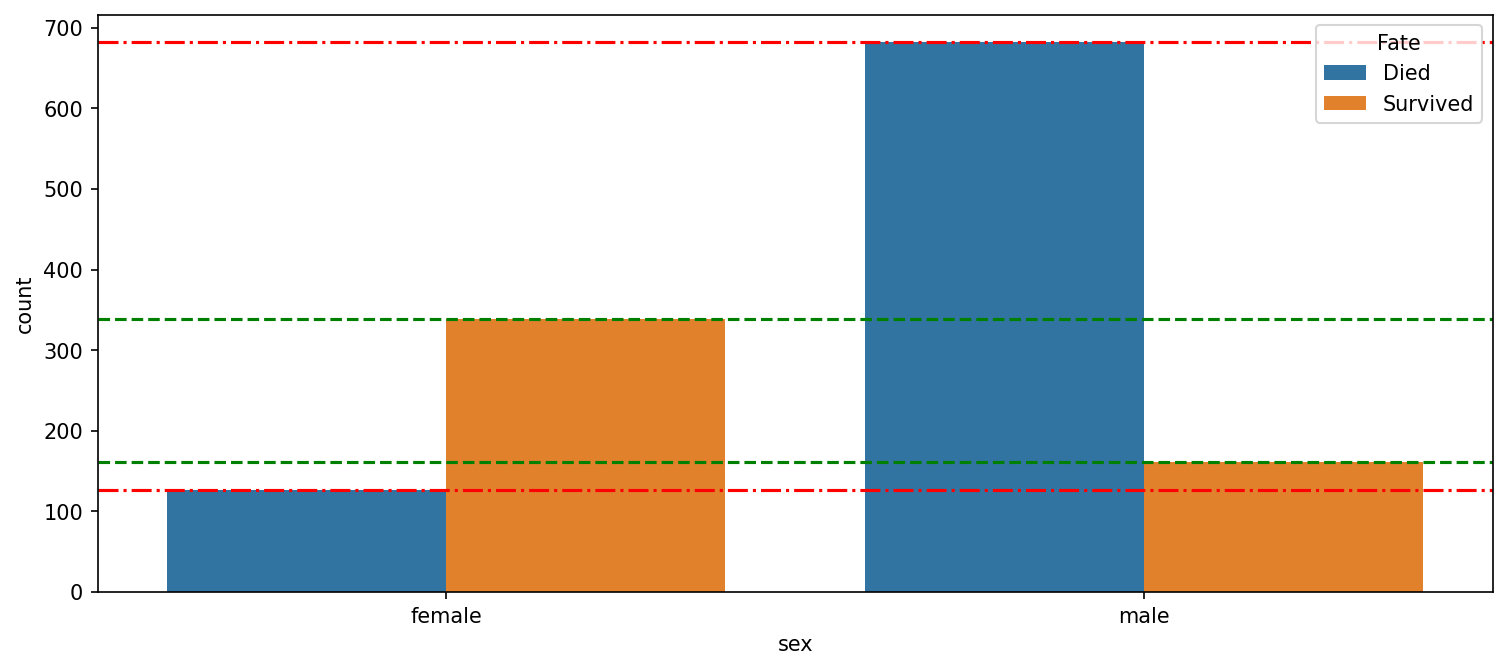

In [6]:
fig, ax = plt.subplots(figsize=(12,5), dpi=150)

sns.countplot(data=df, x='sex', hue='survived')

plt.legend(title="Fate", labels=["Died", "Survived"])

plt.axhline(y=male_surv_count, color='green', linestyle='--', label='Alive Men')
plt.axhline(y=male_dead_count, color='red', linestyle='-.', label='Dead Men')

plt.axhline(y=female_surv_count, color='green', linestyle='--', label='Alive Women')
plt.axhline(y=female_dead_count, color='red', linestyle='-.', label='Dead Women')

## Plotly equivalent of graph above

In [12]:
# Create a DataFrame for Plotly Express
data_plotly = pd.DataFrame({
    'sex': ['Male', 'Male', 'Female', 'Female'],
    'survived': ['Survived', 'Died', 'Survived', 'Died'],
    'count': [male_surv_count, male_dead_count, female_surv_count, female_dead_count]
})

# Create a horizontal bar plot using Plotly Express
fig = px.bar(data_plotly, x='count', y='sex', color='survived', barmode='group',
             labels={'count': 'Count', 'sex': 'Sex', 'survived': 'Fate'},
             title='Survival Count by Gender')

# Customize the layout and legend
fig.update_layout(
    legend_title='Fate',
    legend=dict(itemsizing='constant')
)

# Show the plot
fig.show()

# Let's print the the above information out in words
print(f"Number of males who survived are: {male_surv_count}")
print(f"Number of males who died are: {male_dead_count}")

print(f"Number of females who survived are: {female_surv_count}")
print(f"Number of females who died are: {female_dead_count}")

Number of males who survived are: 161
Number of males who died are: 682
Number of females who survived are: 339
Number of females who died are: 127


## Conclusion: 
### It is clear that you were more likely to survive on the Titanic if you were a woman.

# Did one's age affect their survival rate?

## Distribution of passengers by age and gender


<Axes: xlabel='age', ylabel='Count'>

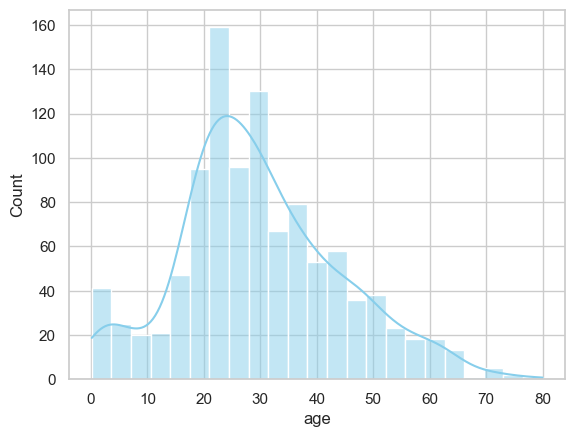

In [14]:
sns.set(style='whitegrid')
sns.histplot(data=df, x='age', bins='auto', kde=True, color='skyblue')

## Finding the optimal number of bins for the age column and their corresponding ranges
Sturges' Formula:

Sturges' Formula is a commonly used method and is given by bins = 1 + log2(N), where N is the number of data points.

In [21]:
bins = 1 + np.log2(len(df['age']))
bins #we should have about 11 bins

11.354249381945241

In [16]:
min(df['age'])

0.1667

In [17]:
max(df['age'])

80.0

In [20]:
80/10

8.0

In [22]:
#now we'll define a function to split the data into bins
def age_bins(age):
    if (age >= 0) and (age <= 9):
        group = "0-9"
        
    elif (age > 9) and (age <= 19):
        group = "10-19"
        
    elif (age > 19) and (age <= 29):
        group = "20-29"
        
    elif (age > 29) and (age <= 39):
        group = "30-39"

    elif (age > 39) and (age <= 49):
        group = "40-49"

    elif (age > 49) and (age <= 59):
        group = "50-59"

    elif (age > 59) and (age <= 69):
        group = "60-69"

    elif (age > 69) and (age <= 79):
        group = "70-79"

    elif (age > 79):
        group = "80+"
        
    else:
        group = "Unknown"

    return group

In [25]:
df['age_group'] = df['age'].apply(age_bins)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_group
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",20-29
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0-9
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0-9
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",30-39
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",20-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,10-19
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,Unknown
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,20-29
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,20-29


In [24]:
#values with 'Unknown' value for age group are the ones missing values (have NaN values)
#for example
df.iloc[1305]

pclass                           3
survived                         0
name         Zabour, Miss. Thamine
sex                         female
age                            NaN
sibsp                            1
parch                            0
ticket                        2665
fare                       14.4542
cabin                          NaN
embarked                         C
boat                           NaN
body                           NaN
home.dest                      NaN
Name: 1305, dtype: object

## Conclusion:
### Your chances of dying increase gradually until you are in your twenties from there the chances decrease gradually as well.
### You are most likely to die if you are between the ages of 20-29.

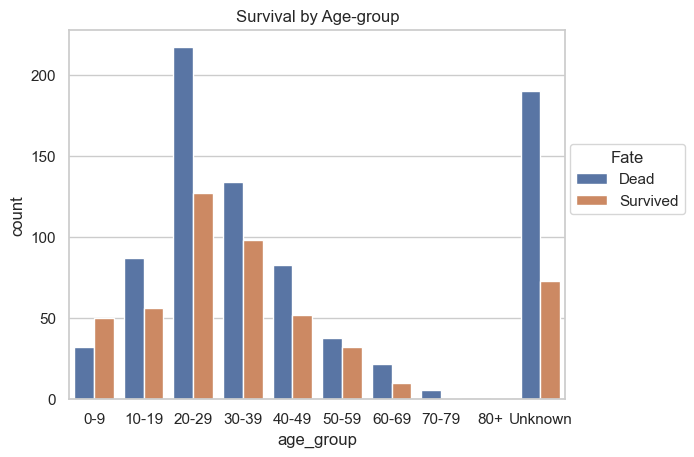

In [51]:
#let's first sort the values by age
df = df.sort_values(by='age', ascending=True)

sns.countplot(data=df, x='age_group', hue='survived')
plt.legend(loc=[1.01,0.5], title='Fate', labels=['Dead', 'Survived'])

plt.title('Survival by Age-group');

## There is a negative correlation between age and survival rate.
### Meaning, the higher your age goes the lower your chances of surviving.

In [53]:
styled_corr = df.corr()

styled_corr.style.apply(lambda x: ["background: red" if v < 0 else "background: green" for v in x])

/var/folders/cq/f7wvmrrd59q39yjjds78qkn40000gn/T/ipykernel_19726/2961435361.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,nan
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,nan,0.058809,-0.099961,0.051099,-0.043110,1.000000


In [64]:
# for i in range(1,4):
#     df_class = df[df['pclass'] == i]
#     print(f"The maximum fare for pclass {i} is {max(df_class.fare)}")
#     print(f"The min fare for pclass {i} is {min(df_class.fare)}")
#     print("\n")

In [65]:
# max(df[df['pclass'] == 3].fare)

In [177]:
# np.random.uniform(1,5,6)

## Does passenger class have an impact on the survival rate?
### Let's explore this column...

In [130]:
#First we will find the average survival rate by class
survival_rate = df.groupby('pclass').mean()[['survived']]
survival_rate

/var/folders/cq/f7wvmrrd59q39yjjds78qkn40000gn/T/ipykernel_19726/1760896709.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,survived
pclass,
1,0.619195
2,0.429603
3,0.255289


In [135]:
#next, we will store the mean survival rate for each class in its own var 
p1_rate = survival_rate.loc[1]
p2_rate = survival_rate.loc[2]
p3_rate = survival_rate.loc[3]

In [142]:
p1_surv = df[(df['pclass']==1) & (df['survived']==1)]
p1_died = df[(df['pclass']==1) & (df['survived']==0)]

p2_surv = df[(df['pclass']==2) & (df['survived']==1)]
p2_died = df[(df['pclass']==2) & (df['survived']==0)]

p3_surv = df[(df['pclass']==3) & (df['survived']==1)]
p3_died = df[(df['pclass']==3) & (df['survived']==0)]

#data points for those who survived will be closer to the bottom
p1_pos = np.random.uniform(0, p1_rate, len(p1_surv))
p1_neg = np.random.uniform(p1_rate, 1, len(p1_died))

p2_pos = np.random.uniform(0, p2_rate, len(p2_surv))
p2_neg = np.random.uniform(p2_rate, 1, len(p2_died))

p3_pos = np.random.uniform(0, p3_rate, len(p3_surv))
p3_neg = np.random.uniform(p3_rate, 1, len(p3_died))

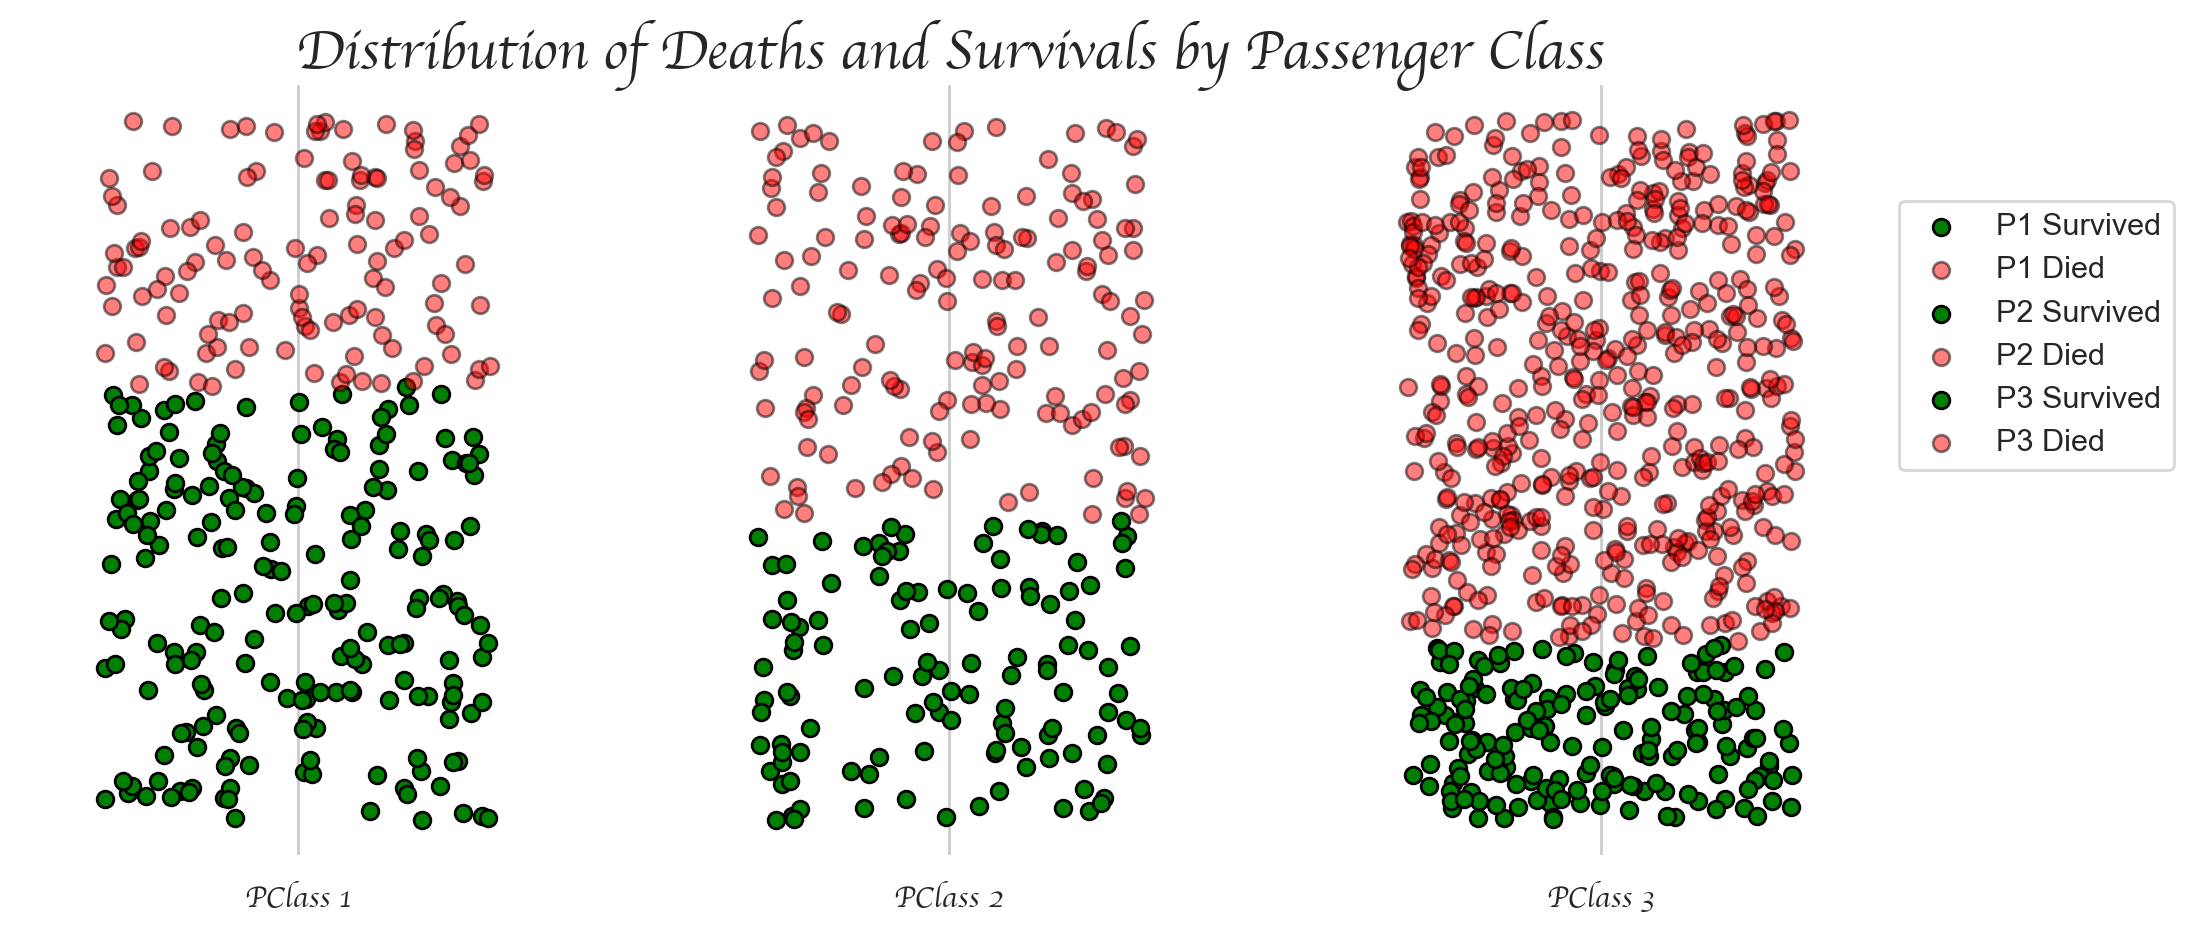

In [176]:
#now that we have all the prerequisites we need, let's create the 
#scatter plot

fig, ax = plt.subplots(figsize=(12,5), dpi=200)

np.random.seed(42)

ax.scatter(x=np.random.uniform(-0.3, 0.3, len(p1_pos)),
           y=p1_pos,
           color='green', 
           edgecolor='black',
           label='P1 Survived');

ax.scatter(x=np.random.uniform(-0.3, 0.3, len(p1_neg)),
           y=p1_neg,
           color='red',
           edgecolor='black',
           alpha=0.5,
           label='P1 Died')

ax.scatter(x=np.random.uniform(-0.3+1, 0.3+1, len(p2_pos)),
           y=p2_pos,
           color='green', 
           edgecolor='black',
           label='P2 Survived')

ax.scatter(x=np.random.uniform(-0.3+1, 0.3+1, len(p2_neg)),
           y=p2_neg,
           color='red',
           edgecolor='black',
           label='P2 Died',
           alpha=0.5)

ax.scatter(x=np.random.uniform(-0.3+2, 0.3+2, len(p3_pos)),
           y=p3_pos,
           color='green', 
           edgecolor='black', 
           label='P3 Survived')

ax.scatter(x=np.random.uniform(-0.3+2, 0.3+2, len(p3_neg)),
           y=p3_neg, 
           color='red', 
           edgecolor='black',
           alpha=0.5, 
           label='P3 Died')

#now let's change the x and y tick labels!
ax.set_xticks([0,1,2])
ax.set_xticklabels(['PClass 1', 'PClass 2', 'PClass 3'], 
                   fontfamily='cursive')

ax.set_yticks([], minor=False) #if minor is True, set the minor ticks, else, set the major ticks
ax.set_ylabel('')

ax.set_title('Distribution of Deaths and Survivals by Passenger Class', 
             fontsize=20,
             fontfamily='cursive')

ax.legend(loc=[1.01, 0.5])

for j in ['top', 'left', 'right', 'bottom']:
    ax.spines[j].set_visible(False)

plt.show()

## Conclusion: 
### The better the passenger class, the less the likelihood of dying and vice versa. 